In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.stats import entropy

import emc2d

np.random.seed(2017)

In [3]:
intensity = np.load("./data/4BED_t40_d5000.npy")

In [25]:
drift_radius = (10, 10)
mean_count= 0.006
motion_sigma = 3.
num_frames = 500
frame_size = (128, 128)
model_size = (frame_size[0] + 2*max_drift[0], frame_size[1] + 2*max_drift[1])
model = emc2d.sim.build_model(intensity, model_size=model_size, mean_count=mean_count)

frames, traj = emc2d.sim.generate_frames(
    intensity, 
    frame_size, 
    drift_radius=max_drift, 
    num_frames=num_frames, 
    mean_count=mean_count, 
    motion_sigma=motion_sigma)

In [41]:
emc = emc2d.core.EMC(
    frames=frames, 
    frame_size=(128, 128), 
    drift_radius=drift_radius, 
    init_model='sum')

nnz / data_size = 0.59%, using csr sparse data format


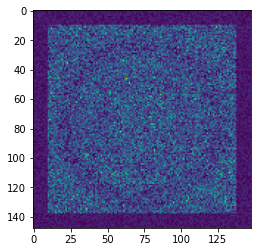

In [42]:
plt.imshow(emc.curr_model)

In [47]:
history = emc.run(iterations=30, lpfs=1.5)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.22it/s]


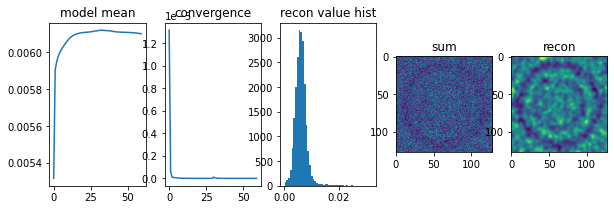

In [48]:
fig1 = emc2d.viz.show_emc_state(emc)

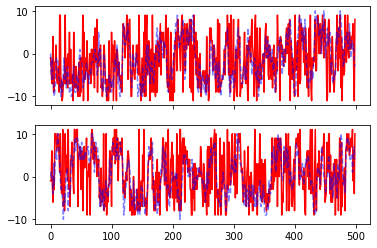

In [49]:
fig2 = emc2d.viz.show_maximum_likelihood_drifts(emc, reference=model, true_traj=traj)

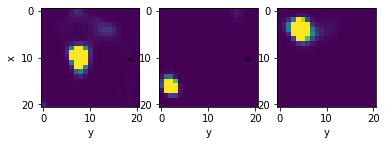

In [50]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True)
emc2d.viz.show_membership_probability(emc.membership_probability, frame_index=0, drift_radius=max_drift, ax=ax1)
emc2d.viz.show_membership_probability(emc.membership_probability, frame_index=100, drift_radius=max_drift, ax=ax2)
emc2d.viz.show_membership_probability(emc.membership_probability, frame_index=200, drift_radius=max_drift, ax=ax3)

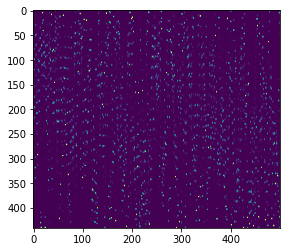

In [51]:
plt.imshow(emc.membership_probability, vmin=0, vmax=0.1)